## Codio Activity 7.2: Defining, Computing, and Optimizing Loss

**Expected Time = 60 Minutes**

**Total Points = 20 Points**

This activity focuses on computing and minimizing the L2 loss for different values of theta and identifying the theta that minimizes the L2 loss.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### The Dataset

The geyser data from seaborn is loaded below.  You are to  build a model using the waiting time to predict the geyser explosion duration.

Note that this this model will not have an intercept term.  

In [4]:
geyser = sns.load_dataset('geyser')

In [7]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


[Back to top](#Index:) 

## Problem 1

### Creating an array of $\theta$'s

**4 Points**

Below, create an array of 100 equally spaced values between -1 and 1.  Use the `np.linspace` method demonstrated in the lectures and assign your answer as a numpy array to `thetas` below.

In [10]:
### GRADED

# YOUR CODE HERE
thetas = np.linspace(-1, 1, 100)

# Answer check
print(type(thetas))
print(thetas.shape)

<class 'numpy.ndarray'>
(100,)


[Back to top](#Index:) 

## Problem 2

### The Model

**4 Points**

In this assignment, our model takes the form:

$$\text{duration} = \text{waiting} \times \theta$$

Multiply the values in the `waiting` column of the `geyser` dataset by `0.8` to create a prediction for the case of $\theta = 0.8$. Assign them as a Series to the variable `prediction` below.

In [12]:
### GRADED

# YOUR CODE HERE
prediction = geyser['waiting'] * 0.8

# Answer check
print(type(prediction))
print(prediction.shape)

<class 'pandas.core.series.Series'>
(272,)


[Back to top](#Index:) 

## Problem 3

### Determining Mean Squared Error

**4 Points**


Use the `mean_squared_error` function to calculate the MSE between the `duration` column of the `geyser` DataFrame and the `0.8*geyser['waiting']` data.

Use the function `float` to convert your result to floats. 

Assign your result as a float to `mse` below.

In [14]:
### GRADED

# YOUR CODE HERE
mse = float(mean_squared_error(geyser['duration'], prediction))

# Answer check
print(type(mse))
print(mse)

<class 'numpy.float64'>
2930.2861285845593


[Back to top](#Index:) 

## Problem 4

### Computing the Mean Squared Error for `thetas`

**4 Points**

Use a `for` loop over `thetas` to compute the MSE between the column `geyser['duration']` and the column `geyser['waiting']`multiplied by each value of `theta`.  Assign these values in order to the list `mses` below.

In [16]:
### GRADED

# YOUR CODE HERE
mses = []

for theta in thetas:
    prediction = geyser['waiting'] * theta
    mses.append(mean_squared_error(geyser['duration'], prediction))

# Answer check
print(type(mses))
print(len(mses))
print(mses[:10])

<class 'list'>
100
[5746.399297702205, 5527.445557830223, 5312.744883371734, 5102.29727432674, 4896.102730695238, 4694.161252477228, 4496.472839672713, 4303.037492281691, 4113.855210304161, 3928.925993740124]


[Back to top](#Index:) 

## Problem 5

### Which $\theta$ minimizes Mean Squared Error

**4 Points**

Using the list of `mses`, determine the value for $\theta$ that minimized the mean squared error.  You may want to ammend your loop above to check for the smallest value as the loop proceeds.  Assign your answer as a float to `theta_min` below.

In [26]:
### GRADED

# YOUR CODE HERE
theta_min = ''
min_mse = ''
df = pd.DataFrame({'theta': thetas, 'mse': mses})

min_mse_index = df['mse'].idxmin()
min_mse = df.loc[min_mse_index, 'mse']
theta_min = df.loc[min_mse_index, 'theta']

# Answer check
print(type(theta_min))
print(min_mse)
print(theta_min)
df

<class 'numpy.float64'>
0.3695626511606713
0.05050505050505061


,theta,mse
0,-1.000000,5746.399298
1,-0.979798,5527.445558
2,-0.959596,5312.744883
3,-0.939394,5102.297274
4,-0.919192,4896.102731
...,...,...
95,0.919192,3935.731081
96,0.939394,4120.818556
97,0.959596,4310.159095
98,0.979798,4503.752701


Note that again the shape of the Mean Squared Error is a parabola.  The plot below shows the values of thetas againt their mean squared error.  

<center>
    <img src = 'images/mse_min.png' >
</center>

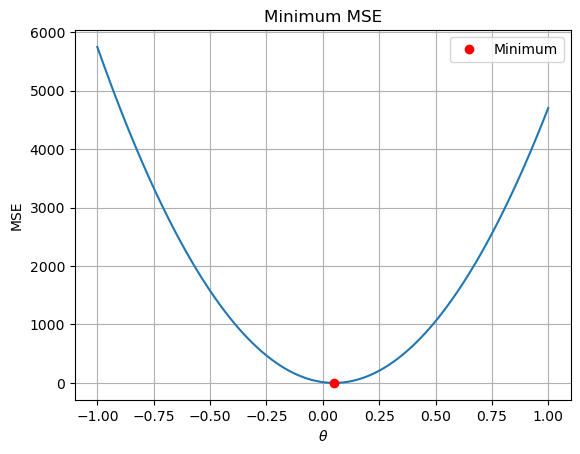

In [28]:
#Code for Plot
plt.plot(thetas, mses)
plt.plot(thetas[np.argmin(mses)], min(mses), 'ro', label = 'Minimum')
plt.legend()
plt.title('Minimum MSE')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.grid()
plt.show()
#plt.savefig('images/mse_min.png')